<a href="https://colab.research.google.com/github/martinpius/PYTORCH/blob/main/CustomDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from timeit import default_timer as timer
t1 = timer()
from google.colab import drive
drive.mount("/content/drive/", force_remount = True)
try:
  import torch, os, requests
  from torch import nn, optim
  from torch.nn import BCEWithLogitsLoss
  from torch.utils.data import Dataset, DataLoader
  from torchvision import transforms
  from skimage import io
  import matplotlib.pyplot as plt
  import numpy as np
  import pandas as pd
  from tqdm.auto import tqdm
  print(f">>>> You are on CoLaB with torch version: {torch.__version__}")
except Exception as e:
  print(f">>>> {type(e)}: {e}\n>>>> Please correct {type(e)} and reload")

def mytimer(t: float = timer())->float:
  h = int(t / (60 * 60))
  m = int(t % (60 * 60) / 60)
  s = int(t % 60)
  return f"hrs: {h}, mins: {m:>02}, secs: {s:>05.2f}"

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
BATCH_SIZE = 1
print(f">>>> Available device: {device}")
!nvidia-smi
print(f"\n>>>> Time elapsed:\t{mytimer(timer() - t1)}")


Mounted at /content/drive/
>>>> You are on CoLaB with torch version: 1.13.1+cu116
>>>> Available device: cpu
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.


>>>> Time elapsed:	hrs: 0, mins: 00, secs: 04.00


In [3]:
# We Implement a customized PyTorch Dataset class to load images from the private directory


In [9]:
class CustomDataset(Dataset):
  def __init__(self, root_dir, csv_path, transform = None):
    self.data_info = pd.read_csv(csv_path)
    self.root_dir = root_dir
    self.csv_path = csv_path
    self.transform = transform

  def __len__(self):
    return len(self.data_info)
  
  def __getitem__(self, index):
    """
    The data_info file is the csv with two columns (image_name and label)
    """
    img_path = os.path.join(self.root_dir, self.data_info.iloc[index, 0]) # Fetch the image path
    img = io.imread(img_path) # read an image
    label = self.data_info.iloc[index, 1] # fetch its label
    if self.transform:
      img = self.transform(img) # Apply transformation to the images
    
    return img, label



In [10]:
# For demo- our dataset consists of few images (10): 
root_dir = "/content/drive/MyDrive/CATDOG/cats_dogs_resized"
csv_path = "/content/drive/MyDrive/CATDOG/cats_dogs.csv"

In [11]:
mydataset = CustomDataset(root_dir, csv_path, transform = transforms.ToTensor())


In [12]:
# Split the data into train validation
train_data, test_data = torch.utils.data.random_split(mydataset, [8, 2])
train_loader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE, shuffle = False)

xtrain_img, ytrain_label = next(iter(train_loader))
xtest_img, ytest_label = next(iter(test_loader))
print(f">>>> xtrain_img shape:{xtrain_img.shape} , ytrain_img shape:{ytrain_label.shape}\
\n>>>> xtest_imga shape:{xtest_img.shape}ytest_labels shape: {ytest_label.shape}")


>>>> xtrain_img shape:torch.Size([1, 3, 224, 224]) , ytrain_img shape:torch.Size([1])
>>>> xtest_imga shape:torch.Size([1, 3, 224, 224])ytest_labels shape: torch.Size([1])


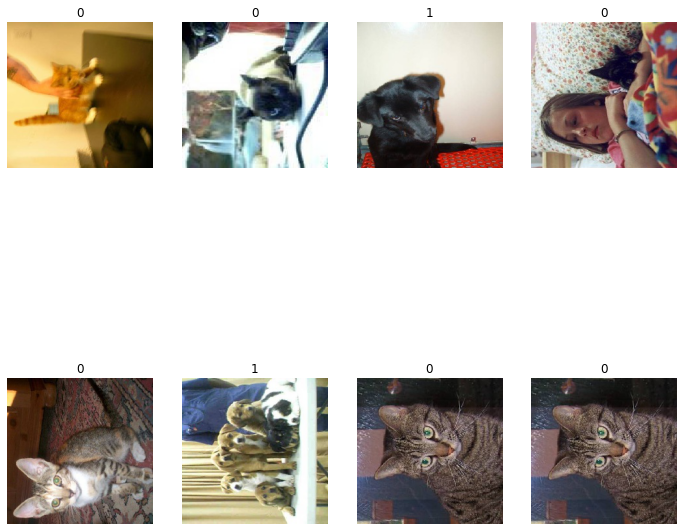

In [27]:
# Vissuzalizing the data
rows, cols = 2, 4
fig = plt.figure(figsize = (12,12))
for k in range(1, rows * cols + 1):
  idx = torch.arange(0, 8, 1)
  img, label = train_data[idx[k-1 if k==8 else k]]
  # reshape the image to be channel last for plotting
  img = img.permute(2, 1, 0).numpy()
  fig.add_subplot(rows, cols, k)
  plt.imshow(img, cmap = plt.cm.RdYlBu)
  plt.title(label)
  plt.axis("off")
  #plt.show()
  